In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import csv
import numpy as np

In [3]:
# Constants
MAX = 2e9
MIN = 1e-5
NUM_DEC = 5
FACTOR = 0.9
MIN_P = 0.55
MAX_P = 0.95
SMALL = 50
MEDIUM = 100
LARGE = 200

# same as number of TA's? TODO:fix this
SMALL_H = 50
MEDIUM_H = 100
LARGE_H = 200

# maximum number of TA's / homes
SMALL_TA = 25
MEDIUM_TA = 50
LARGE_TA = 100

In [4]:
# G = nx.Graph([(1,1), (2,2), (1,2), (1,2)])
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)
G.add_edge(2, 2)
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1]
 [1 1]]


In [8]:
G = nx.Graph()
# H = nx.path_graph(2)
# G.add_nodes_from(H)
G = nx.petersen_graph()
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
# plt.show()
# plt.subplot(121)

# nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)

# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

[0, 1, 2]
[(0, 1), (0, 2), (1, 2)]
{'weight': 4.7}
9


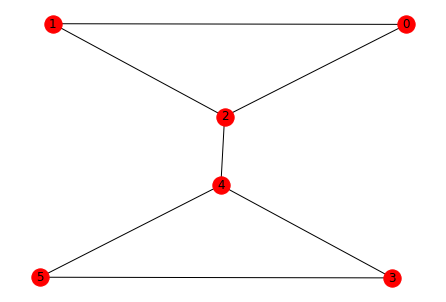

In [11]:
G1 = nx.complete_graph(3)
# plt.subplot(121)
# nx.draw(G1, node_color='blue', with_labels=True)
print(list(G1.nodes()))
print(list(G1.edges()))

G2 = nx.complete_graph(range(3,6))
# plt.subplot(122)
# nx.draw(G2, node_color='red', with_labels=True)

G3 = nx.union(G1, G2)
G3.add_edge(2, 4, weight=4.7)
print(G3[4][2])
nx.draw(G3, node_color='red', with_labels=True)
print(list(G.nodes()).pop())

In [113]:
def add_weights(g):
    w1 = rd.uniform(MIN, MAX)
    w2 = rd.uniform(MIN_P * w1, MAX_P * w1)
    w3 = rd.uniform(MIN_P * w1, MAX_P * w1)
    ws = [w1, w2, w3]
    for _, data in g.edges.items():
        data['weight'] = round(ws.pop(), NUM_DEC)
    
def connect(G, g):
    Gnodes = list(G.nodes)
    gnodes = list(g.nodes)
    G = nx.union(G, g)
    for n in gnodes:
        idx = rd.randrange(0, len(Gnodes))
        a = Gnodes.pop(idx)
        try:
            w = nx.shortest_path_length(G, source=a, target=n) * FACTOR
        except nx.NetworkXNoPath:
            ws = [i for _, _, i in g.edges.data('weight')]
            w = rd.uniform(min(ws), max(ws)) * FACTOR
        G.add_edge(a, n, weight=round(w, NUM_DEC))
    return G
        
def gen_graph(n):
    G = nx.Graph()
    while n:
        a = n.pop()
        b = n.pop()
        c = n.pop()
        nodes = [a, b, c]
        g = nx.complete_graph(nodes)
        add_weights(g)
        if len(G.nodes) == 0:
            G = g
        else:
            G = connect(G, g)
    return G

[[3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 12449

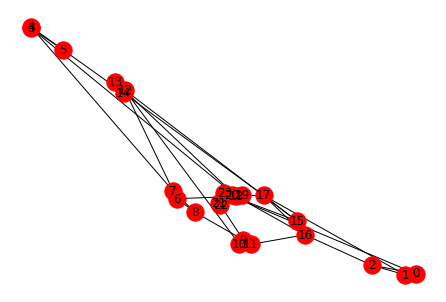

In [135]:
G = gen_graph(list(range(24)))
try:
    nx.shortest_path_length(G, source=2, target=3)
except nx.NetworkXNoPath:
    print("No path")
# for e in G.edges.items():
#     print(e)
nx.draw(G, node_color='red', with_labels=True)
A = nx.adjacency_matrix(G).toarray()
B = [[None] * len(A[0])] * len(A)
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j] == 0.0:
            B[i][j] = 'x'
        else:
            B[i][j] = A[i][j]
print(B)

In [136]:
def write_to_file(file, string, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        f.write(string)


def write_data_to_file(file, data, separator, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        for item in data:
            f.write(f'{item}{separator}')

In [145]:
f = open('world-cities.csv')
csv_f = csv.reader(f)
world_cities = []
for r in csv_f:
    name = r[0]
    if name.isalpha() and name != 'name':
        world_cities.append(name)
city_num = len(world_cities)
# print(world_cities)
small_list = []
medium_list = []
large_list = []
for i in range(SMALL):
    idx = rd.randrange(0, city_num)
    small_list.append(world_cities[idx])
for i in range(MEDIUM):
    idx = rd.randrange(0, city_num)
    medium_list.append(world_cities[idx])
for i in range(LARGE):
    idx = rd.randrange(0, city_num)
    large_list.append(world_cities[idx])

In [146]:
input_file = "7\n4\nSoda"
write_to_file("input.txt", input_file)

# Method 2: Complete Graph with Random Weights Adjusted

Generate a complete graph with random weights associated each edge. Use floyd_warshall to produce the 
all-pairs shortest path distances. For each edge, set the length of the edge to be the length of the shortest distance between those two vertices.

/home/radar/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


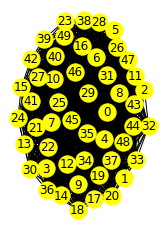

In [102]:
# Generate 
G_final = nx.complete_graph(SMALL)
plt.subplot(121)
nx.draw(G_final, node_color='yellow', with_labels=True)

# print(list(G1.nodes()))
# print(list(G1.edges()))

In [103]:
def print_edge_weights(g):
    for edge, data in g.edges.items():
        print(edge, data)  

In [104]:
def add_weights2(g, lower, upper):
    """Update the weight of each edge to be a random weight within the bounds."""
    for edge, data in g.edges.items():
        w = rd.uniform(lower, upper)
        data['weight'] = round(w, NUM_DEC)
#         print(edge, data)        

In [105]:
dict1 = nx.floyd_warshall(G_final, weight='weight')
# plt.subplot(121)
# nx.draw(G_final, node_color='yellow', with_labels=True)
# print(list(G_final.nodes()))
# print(list(G_final.edges().items()))
# dict1 = nx.all_pairs_shortest_path_length(G_final)

In [106]:
def print_shortest_pair_distance(g):
    rs = nx.floyd_warshall(g)
    for i in rs:
        for j in rs[i]:
            print ("%d\t%d\t%f" % (i, j, rs[i][j]))

In [107]:
def fix_triangle_inequalities(g):
    done = False
    while not done:
        done = True
        rs = nx.floyd_warshall(g, weight='weight')
        for edge, data in g.edges.items():
            if data['weight'] > rs[edge[0]][edge[1]]:
                print('change ' + str(edge) + " " + str(data['weight']) + " to " + str(rs[edge[0]][edge[1]]))
                data['weight'] = rs[edge[0]][edge[1]]
                done = False
                break

Generate random weight for each edge.

In [108]:
# G_final[2][3]['weight'] = 78.73409
add_weights2(G_final, 1, 100)
print_edge_weights(G_final)  

(0, 1) {'weight': 47.87497}
(0, 2) {'weight': 71.06875}
(0, 3) {'weight': 34.41014}
(0, 4) {'weight': 47.75295}
(0, 5) {'weight': 76.59045}
(0, 6) {'weight': 81.50037}
(0, 7) {'weight': 89.69587}
(0, 8) {'weight': 46.52197}
(0, 9) {'weight': 47.61456}
(0, 10) {'weight': 13.80408}
(0, 11) {'weight': 18.44974}
(0, 12) {'weight': 69.92816}
(0, 13) {'weight': 12.52015}
(0, 14) {'weight': 20.78516}
(0, 15) {'weight': 10.00993}
(0, 16) {'weight': 4.75912}
(0, 17) {'weight': 54.49437}
(0, 18) {'weight': 84.4643}
(0, 19) {'weight': 31.12921}
(0, 20) {'weight': 18.65219}
(0, 21) {'weight': 14.30439}
(0, 22) {'weight': 55.47216}
(0, 23) {'weight': 70.68854}
(0, 24) {'weight': 93.4099}
(0, 25) {'weight': 28.67519}
(0, 26) {'weight': 43.54673}
(0, 27) {'weight': 62.57153}
(0, 28) {'weight': 77.10392}
(0, 29) {'weight': 80.3785}
(0, 30) {'weight': 69.33632}
(0, 31) {'weight': 39.57938}
(0, 32) {'weight': 54.38121}
(0, 33) {'weight': 27.60228}
(0, 34) {'weight': 67.17597}
(0, 35) {'weight': 28.73663

Fix the weight to satisfy the trangle inequalities.

In [109]:
fix_triangle_inequalities(G_final)
print_edge_weights(G_final)  

change (0, 1) 47.87497 to 15.0347
change (0, 2) 71.06875 to 18.112849999999998
change (0, 3) 34.41014 to 17.057290000000002
change (0, 4) 47.75295 to 13.69331
change (0, 5) 76.59045 to 7.18386
change (0, 3) 17.057290000000002 to 17.05729
change (0, 6) 81.50037 to 18.1107
change (0, 7) 89.69587 to 8.29173
change (0, 8) 46.52197 to 17.65962
change (0, 9) 47.61456 to 13.265229999999999
change (0, 11) 18.44974 to 12.43441
change (0, 12) 69.92816 to 13.135369999999998
change (0, 14) 20.78516 to 12.1407
change (0, 17) 54.49437 to 18.238030000000002
change (0, 18) 84.4643 to 16.30619
change (0, 19) 31.12921 to 10.08735
change (0, 21) 14.30439 to 13.7682
change (0, 22) 55.47216 to 14.647759999999998
change (0, 23) 70.68854 to 18.32341
change (0, 24) 93.4099 to 15.74292
change (0, 25) 28.67519 to 12.399080000000001
change (0, 26) 43.54673 to 13.663739999999999
change (0, 27) 62.57153 to 17.941000000000003
change (0, 28) 77.10392 to 16.29544
change (0, 29) 80.3785 to 14.881839999999999
change (0

change (0, 17) 18.238030000000002 to 18.23803
change (5, 18) 66.92159 to 9.12233
change (5, 19) 34.29349 to 7.7529699999999995
change (5, 20) 90.63237 to 14.43933
change (5, 21) 26.02253 to 9.393839999999999
change (5, 22) 17.76895 to 7.4639
change (5, 23) 18.30384 to 11.13955
change (5, 24) 27.85876 to 12.60792
change (5, 25) 53.18976 to 7.25131
change (5, 26) 69.0329 to 6.47988
change (5, 27) 58.52327 to 10.75714
change (0, 27) 17.941000000000003 to 17.941
change (5, 28) 29.33193 to 9.44244
change (5, 29) 58.31738 to 7.697979999999999
change (5, 30) 16.51035 to 10.79159
change (5, 31) 88.46393 to 10.71721
change (5, 33) 64.76489 to 6.57485
change (5, 34) 86.15147 to 12.12292
change (5, 35) 44.08856 to 12.03774
change (5, 36) 92.89165 to 7.402419999999999
change (5, 37) 61.46202 to 14.24153
change (5, 38) 80.57669 to 18.141489999999997
change (5, 39) 72.97932 to 5.16979
change (5, 40) 42.19083 to 15.89686
change (5, 41) 55.31843 to 16.73371
change (5, 42) 92.34334 to 9.02143
change (5

change (10, 35) 32.29119 to 8.73851
change (10, 36) 12.72949 to 12.53538
change (10, 37) 59.79108 to 17.262459999999997
change (10, 38) 90.71571 to 14.84226
change (10, 39) 69.94497 to 11.60261
change (10, 40) 83.61853 to 13.447759999999999
change (10, 41) 59.26162 to 17.28396
change (10, 42) 36.25117 to 15.505749999999999
change (10, 44) 28.66403 to 11.38567
change (10, 45) 53.92129 to 12.69473
change (10, 46) 58.1819 to 19.23006
change (10, 47) 11.05999 to 9.91387
change (10, 48) 38.52315 to 11.3292
change (11, 12) 36.08676 to 14.316559999999999
change (11, 13) 54.56627 to 8.267700000000001
change (11, 14) 93.73439 to 15.54943
change (11, 15) 65.828 to 17.6802
change (11, 17) 52.21486 to 15.142629999999999
change (11, 18) 70.35947 to 17.48738
change (11, 19) 42.3811 to 8.10044
change (11, 20) 33.24473 to 22.24406
change (11, 21) 91.75415 to 17.01259
change (11, 22) 48.21355 to 17.56393
change (11, 23) 32.54951 to 18.31768
change (11, 25) 15.96198 to 8.66512
change (11, 26) 63.01701 t

change (17, 19) 48.31795 to 10.747349999999999
change (17, 20) 30.89324 to 15.952720000000001
change (17, 21) 57.58397 to 11.44468
change (17, 22) 26.79476 to 13.451730000000001
change (17, 23) 72.51929 to 13.69981
change (17, 24) 93.64193 to 16.070520000000002
change (17, 25) 94.02156 to 10.72569
change (17, 26) 12.33265 to 9.040140000000001
change (17, 27) 52.80615 to 4.6674299999999995
change (6, 17) 6.0098 to 6.009799999999999
change (17, 28) 55.21915 to 8.67603
change (17, 29) 62.19948 to 11.10118
change (17, 31) 91.03962 to 7.7009799999999995
change (17, 32) 47.86393 to 12.13764
change (17, 33) 78.92692 to 12.57477
change (17, 34) 97.68955 to 9.10669
change (17, 35) 22.08104 to 15.80565
change (17, 36) 48.45081 to 8.89477
change (17, 37) 70.11657 to 15.607099999999999
change (17, 38) 87.33963 to 22.63543
change (17, 39) 38.7948 to 14.900149999999998
change (17, 41) 18.25072 to 13.65834
change (17, 42) 74.50187 to 12.42546
change (17, 43) 88.26626 to 11.284329999999999
change (17,

change (25, 26) 70.65464 to 11.51545
change (25, 27) 86.30493 to 10.42866
change (25, 28) 46.46504 to 12.702860000000001
change (25, 29) 63.17773 to 12.73355
change (25, 30) 50.25609 to 13.1511
change (25, 31) 27.11322 to 13.46221
change (25, 32) 82.66684 to 8.33478
change (25, 33) 65.74476 to 8.93436
change (25, 34) 66.05248 to 14.867920000000002
change (25, 35) 48.67975 to 11.86507
change (25, 36) 80.52078 to 12.43799
change (25, 37) 61.59194 to 13.457899999999999
change (25, 38) 75.10213 to 17.96882
change (25, 39) 25.36711 to 12.4211
change (25, 40) 44.87873 to 15.568380000000001
change (25, 42) 61.87236 to 14.056999999999999
change (25, 44) 53.25866 to 12.31836
change (25, 46) 80.58943 to 21.35068
change (25, 47) 64.91738 to 9.81648
change (25, 48) 39.80496 to 9.88045
change (26, 27) 68.70274 to 13.707569999999999
change (26, 28) 70.66421 to 13.706579999999999
change (26, 30) 85.55104 to 14.28858
change (26, 31) 87.79704 to 10.17141
change (26, 32) 63.1093 to 7.56335
change (26, 3

change (39, 41) 40.25114 to 12.990950000000002
change (39, 42) 37.87684 to 14.191219999999998
change (39, 43) 8.62411 to 7.615689999999999
change (39, 44) 80.82065 to 11.59042
change (39, 45) 24.91565 to 11.85938
change (39, 47) 54.44293 to 9.9507
change (39, 48) 60.26627 to 10.014669999999999
change (39, 49) 46.98042 to 12.417919999999999
change (40, 41) 28.94749 to 18.50103
change (40, 42) 29.60232 to 17.26815
change (40, 43) 88.41822 to 16.127019999999998
change (40, 44) 57.03926 to 19.42476
change (40, 45) 40.10565 to 11.29981
change (40, 46) 78.10547 to 20.43214
change (40, 47) 98.40711 to 11.115950000000002
change (40, 48) 38.74543 to 15.51783
change (40, 49) 37.22079 to 7.3249200000000005
change (41, 42) 44.6119 to 14.17707
change (41, 43) 97.26885 to 16.72598
change (41, 44) 65.39854 to 16.63019
change (41, 45) 20.59278 to 20.19925
change (41, 46) 30.29671 to 20.91655
change (41, 47) 41.10643 to 15.354210000000002
change (41, 48) 27.40305 to 11.88883
change (41, 49) 32.03872 to

(30, 48) {'weight': 13.420729999999999}
(30, 49) {'weight': 7.73067}
(31, 32) {'weight': 11.28549}
(31, 33) {'weight': 7.45441}
(31, 34) {'weight': 1.40571}
(31, 35) {'weight': 11.29647}
(31, 36) {'weight': 7.9100399999999995}
(31, 37) {'weight': 16.7152}
(31, 38) {'weight': 16.45944}
(31, 39) {'weight': 7.19917}
(31, 40) {'weight': 12.543669999999999}
(31, 41) {'weight': 10.38188}
(31, 42) {'weight': 12.0885}
(31, 43) {'weight': 10.94737}
(31, 44) {'weight': 8.66064}
(31, 45) {'weight': 11.79064}
(31, 46) {'weight': 10.534669999999998}
(31, 47) {'weight': 5.9363}
(31, 48) {'weight': 8.53641}
(31, 49) {'weight': 5.21875}
(32, 33) {'weight': 7.65832}
(32, 34) {'weight': 12.691199999999998}
(32, 35) {'weight': 13.12121}
(32, 36) {'weight': 8.48589}
(32, 37) {'weight': 15.325}
(32, 38) {'weight': 19.224959999999996}
(32, 39) {'weight': 4.08632}
(32, 40) {'weight': 16.98033}
(32, 41) {'weight': 17.07727}
(32, 42) {'weight': 10.1049}
(32, 43) {'weight': 3.52937}
(32, 44) {'weight': 7.5041}
